Text(0, 0.5, 'Second Feature')

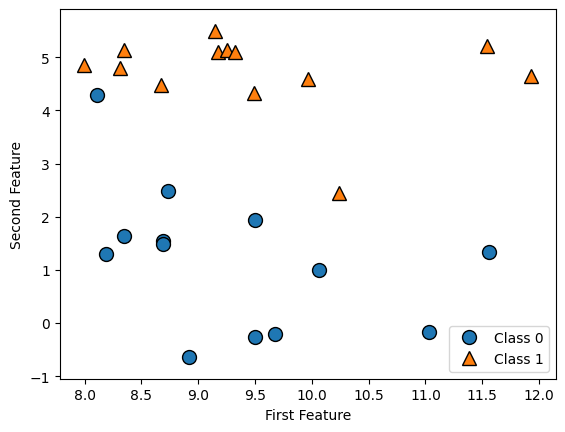

In [1]:
import mglearn
import numpy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

In [2]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

print("Test set score: {:.2f}".format(clf.score(X_test,y_test)))

Test set score: 0.86


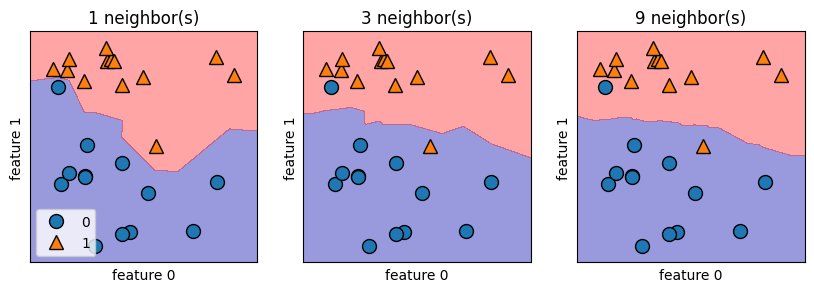

In [3]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors,axe in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=axe,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axe)
    axe.set_title("{} neighbor(s)".format(n_neighbors))
    axe.set_xlabel("feature 0")
    axe.set_ylabel("feature 1")
axes[0].legend(loc=3)

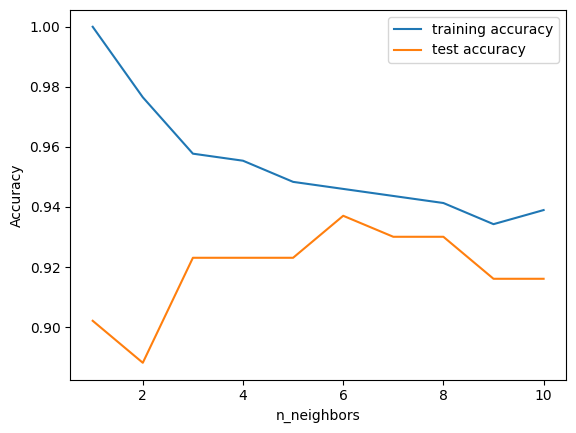

In [4]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]
neighbors_numbers=range(1,11)

for n in neighbors_numbers:
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_numbers,training_accuracy,label="training accuracy")
plt.plot(neighbors_numbers,test_accuracy,label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

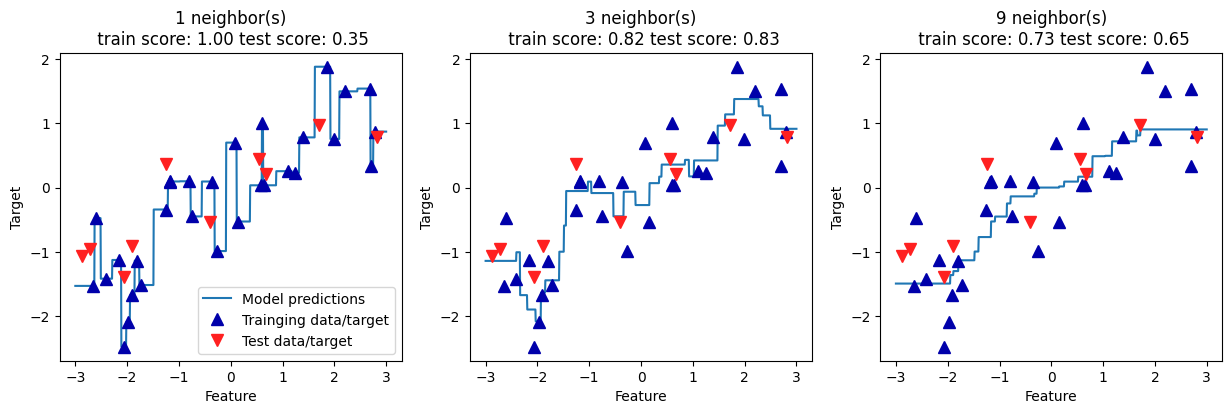

In [5]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

fig,axes=plt.subplots(1,3,figsize=(15,4))
line=numpy.linspace(-3,3,1000).reshape(-1,1)
for n,axe in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train,y_train)
    axe.plot(line,reg.predict(line))
    axe.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    axe.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

    axe.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    axe.set_xlabel("Feature")
    axe.set_ylabel("Target")
    axes[0].legend(["Model predictions","Trainging data/target","Test data/target"],loc="best")

In [6]:
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

print("lr.coef_:",lr.coef_)
print("lr.intercept_:",lr.intercept_)

print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973
Training set score:0.67
Test set score:0.66


In [7]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Training set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.95
Training set score:0.61


In [8]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))

Training set score:0.89
Test set score:0.75


In [9]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

Training set score:0.79
Test set score:0.64


In [10]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test,y_test)))

Training set score:0.93
Test set score:0.77


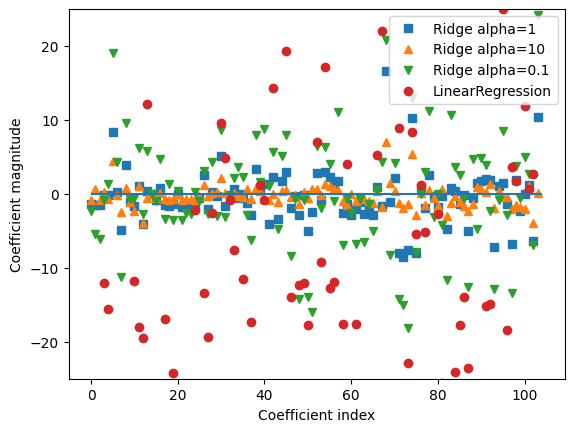

In [11]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

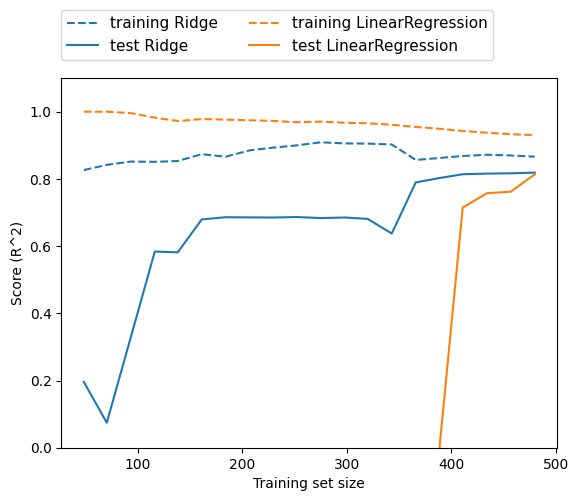

In [12]:
mglearn.plots.plot_ridge_n_samples()

In [13]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used:",numpy.sum(lasso.coef_!=0))

Training set score:0.29
Test set score:0.21
Number of features used: 4


In [14]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:",numpy.sum(lasso001.coef_!=0))

Training set score:0.90
Test set score:0.77
Number of features used: 33


In [15]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used:",numpy.sum(lasso00001.coef_!=0))

Training set score:0.95
Test set score:0.64
Number of features used: 96


Text(0, 0.5, 'coefficient magnitude')

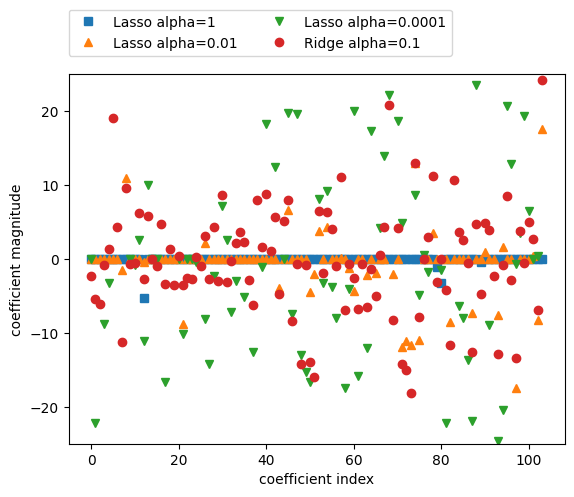

In [16]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")

In [20]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression(max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.958
Test set score:0.958


In [21]:
logreg100=LogisticRegression(C=100,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Training set score:0.984
Test set score:0.965


In [23]:
logreg001=LogisticRegression(C=0.001,max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Training set score:0.953
Test set score:0.944


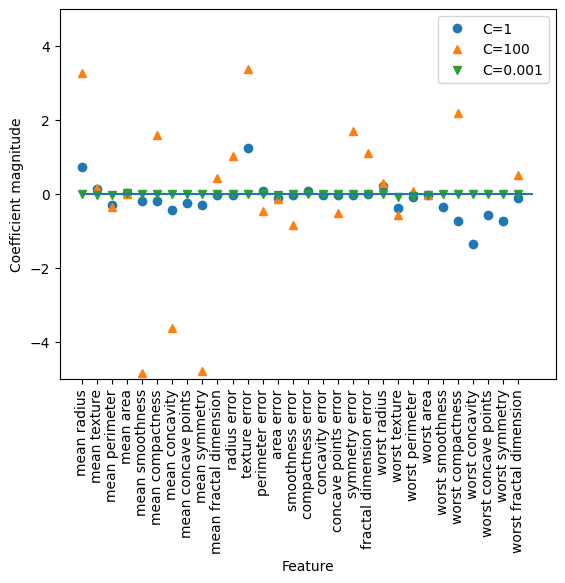

In [24]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

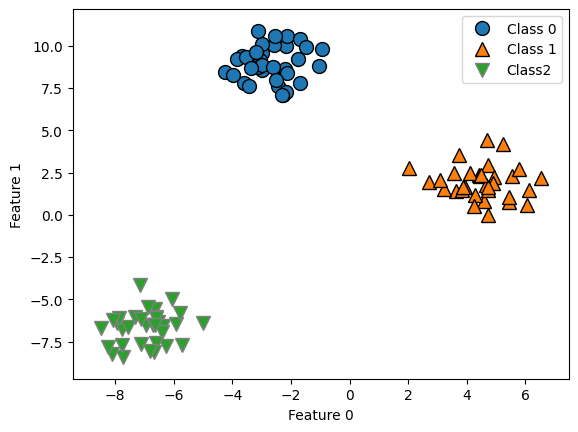

In [25]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class2"])

In [28]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC(dual=False).fit(X,y)
print("Coeficient shape:",linear_svm.coef_.shape)
print("intercept shape:",linear_svm.intercept_.shape)

Coeficient shape: (3, 2)
intercept shape: (3,)
